In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

from UZ_utils import *

In [2]:
def myhist(I, bins):
    H = np.zeros(bins) # Creation of the array that will contain the values of the histogram
    I.reshape(-1) # Transform I into a 1D array
    
    # Max and min values in I
    Imax = np.max(I)
    Imin = np.min(I)

    lim = (Imax - Imin)/bins

    for x in range(bins):
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                lim_inf = (x*lim) + Imin
                lim_sup = (x+1) * lim + Imin
                
                if (lim_inf <= I[i,j] and I[i,j] < lim_sup):
                    H[x] = H[x] + 1
        
    return H

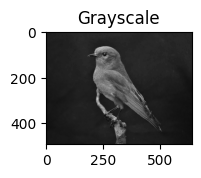

In [4]:
Img = imread('images/bird.jpg') # --> Image values are from [0,1] float
I_gray = ((Img[:,:,0] + Img[:,:,1] + Img[:,:,2]) / 3)

plt.subplot(1,3,1)
plt.imshow(I_gray, cmap="gray")
plt.title('Grayscale')

Hist = myhist(I_gray,10) # Histogram

Hist_normalized = Hist / (I_gray.shape[0] * I_gray.shape[1])

Text(0.5, 1.0, '10 bins')

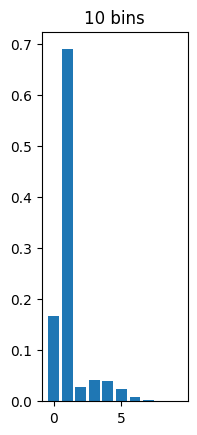

In [5]:
plt.subplot(1,3,2)
plt.bar(range(len(Hist_normalized)), Hist_normalized)
plt.title('10 bins')

In [7]:
Hist_normalized = myhist(I_gray,100) / (I_gray.shape[0] * I_gray.shape[1])

Text(0.5, 1.0, '100 bins')

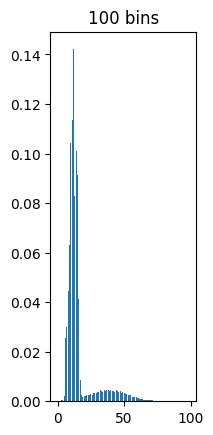

In [8]:
plt.subplot(1,3,3)
plt.bar(range(len(Hist_normalized)), Hist_normalized)
plt.title('100 bins')

In [ ]:
plt.show()